<a href="https://colab.research.google.com/github/harinivas-28/AIML-Chatbot/blob/main/Text2Sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install langchain_core langchain_huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [6]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [7]:
import pandas as pd
import torch
from transformers import AutoTokenizer, pipeline
from langchain_huggingface import HuggingFacePipeline
from langchain_core.prompts import PromptTemplate

df = pd.read_csv('/content/Heart.csv')

print(df.isnull().sum())
print(df.head(),df.columns)

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64
   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   N

In [8]:
# Initialize the model and tokenizer
from typing import List, Dict
model = "meta-llama/Llama-2-7b-chat-hf"
tokenizer = AutoTokenizer.from_pretrained(model)

pipeline = pipeline(
    "text-generation",  # task
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    truncation=True  # Add truncation=True
)

llm = HuggingFacePipeline(pipeline=pipeline, model_kwargs={'temperature': 0})

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [36]:
def get_prompt(tables, question):
    templates = {
        "prompt": f"""
You are a SQL query generator. Given the table structure and a question, generate a MySQL query that best answers the question.

Table Structure:
{tables}

Question:
{question}

Return the SQL query only:
"""
    }
    return templates["prompt"]


def prepare_input(question: str, tables: Dict[str, List[str]]):
    tables_str = [f"""{table_name}({",".join(tables[table_name])})""" for table_name in tables]
    tables_str = ", ".join(tables_str)
    prompt = get_prompt(tables_str, question)
    input_ids = tokenizer(prompt, max_length=512, return_tensors="pt", truncation=True).input_ids
    return prompt  # Return the prompt string instead of input_ids

def inference(question: str, tables: Dict[str, List[str]]) -> str:
    prompt = prepare_input(question=question, tables=tables)
    outputs = llm(prompt)  # Use the HuggingFacePipeline instance
    return outputs

def post_process(query: str) -> str:
    # Find the start of the SQL query
    start_index = query.find("SELECT")
    if start_index == -1:
        return "No SQL query found in the output."

    # Find the end of the SQL query (first semicolon after SELECT)
    end_index = query.find(";", start_index)
    if end_index == -1:
        end_index = len(query)  # If no semicolon, take the rest of the string

    # Extract and return the SQL query part
    sql_query = query[start_index:end_index + 1].strip()  # Include the semicolon
    return sql_query


question = input("Enter your question: ")
table_structure = {"data": df.columns.tolist()}

outputs = inference(question=question, tables=table_structure)
print(outputs)
sql_query = post_process(outputs)
print(f"Generated SQL Query: {sql_query}")

Enter your question: For each type of ChestPain, calculate the maximum Oldpeak value and count the number of patients. Return the results ordered by ChestPain

You are a SQL query generator. Given the table structure and a question, generate a MySQL query that best answers the question.

Table Structure:
data(Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD)

Question:
For each type of ChestPain, calculate the maximum Oldpeak value and count the number of patients. Return the results ordered by ChestPain

Return the SQL query only:
```
SELECT 
    ChestPain, 
    MAX(Oldpeak), 
    COUNT(DISTINCT PatientID) 
FROM 
    data 
GROUP BY 
    ChestPain;
```
Explanation:
The query first selects the ChestPain, Max(Oldpeak), and COUNT(DISTINCT PatientID) columns from the data table. Then it groups the results by the ChestPain column and orders them by the ChestPain column.

Please provide the SQL query without any explanations or comments.
Generated SQ

In [37]:
def replace_table_name(query, table_name):
    keywords = ["FROM", "JOIN"]
    revised_query = query

    for keyword in keywords:
        # Find the position of the keyword (FROM or JOIN)
        keyword_pos = revised_query.upper().find(keyword)
        while keyword_pos != -1:
            # Find the start and end position of the table name following the keyword
            start_pos = keyword_pos + len(keyword) + 1
            end_pos = start_pos
            while end_pos < len(revised_query) and revised_query[end_pos] != ' ':
                end_pos += 1

            # Extract the part before and after the table name
            before_table = revised_query[:start_pos]
            after_table = revised_query[end_pos:]

            # Create the revised query
            revised_query = before_table + table_name + after_table

            # Find the next occurrence of the keyword
            keyword_pos = revised_query.upper().find(keyword, keyword_pos + len(keyword))

    return revised_query

In [38]:
import sqlite3

table_name = 'data'

revised_sql_query = replace_table_name(sql_query, table_name)
# print(f"Generated SQL Query: {sql_query}")
print(f"Revised SQL Query: {revised_sql_query}")
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load DataFrame into SQLite
df.to_sql(table_name, conn, index=False, if_exists='replace')

# Execute the generated SQL query
try:
    result = pd.read_sql_query(revised_sql_query, conn)
    print(result)
except Exception as e:
    print(f"Error executing query: {e}")

Revised SQL Query: SELECT 
    ChestPain, 
    MAX(Oldpeak), 
    COUNT(DISTINCT PatientID) 
FROM data    data 
GROUP BY 
    ChestPain;
Error executing query: Execution failed on sql 'SELECT 
    ChestPain, 
    MAX(Oldpeak), 
    COUNT(DISTINCT PatientID) 
FROM data    data 
GROUP BY 
    ChestPain;': no such column: PatientID


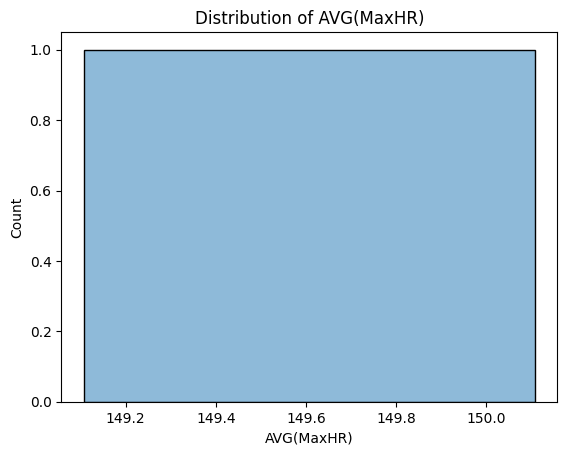

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_result(result: pd.DataFrame):
    if result.empty:
        print("Result DataFrame is empty.")
        return

    num_columns = len(result.columns)

    # Single Column: Histogram or Pie Chart
    if num_columns == 1:
        column = result.columns[0]
        if pd.api.types.is_numeric_dtype(result[column]):
            sns.histplot(result[column], kde=True)
            plt.xlabel(column)
            plt.title(f'Distribution of {column}')
            plt.show()
        else:
            # Ensure the data is categorical and use value_counts for pie chart
            if result[column].dtype == 'object':
                value_counts = result[column].value_counts()
                plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
                plt.title(f'Distribution of {column}')
                plt.show()
            else:
                print(f"Cannot plot pie chart for non-categorical data in column {column}")

    # Two Columns: Bar Plot, Scatter Plot, or Count Plot
    elif num_columns == 2:
        x_col, y_col = result.columns
        if pd.api.types.is_numeric_dtype(result[x_col]) and pd.api.types.is_numeric_dtype(result[y_col]):
            sns.scatterplot(x=x_col, y=y_col, data=result)
            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.title(f'{y_col} vs {x_col}')
            plt.show()
        elif pd.api.types.is_numeric_dtype(result[y_col]) and result[x_col].dtype == 'object':
            sns.barplot(x=x_col, y=y_col, data=result)
            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.title(f'{y_col} by {x_col}')
            plt.show()
        elif result[x_col].dtype == 'object' and result[y_col].dtype == 'object':
            sns.countplot(x=x_col, hue=y_col, data=result)
            plt.xlabel(x_col)
            plt.title(f'{y_col} count by {x_col}')
            plt.show()

    # More than Two Columns: Heatmap for Correlation or Pair Plot
    else:
        numeric_cols = result.select_dtypes(include='number').columns
        if len(numeric_cols) > 1:
            corr = result[numeric_cols].corr()
            sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
            plt.title('Correlation Heatmap')
            plt.show()
        else:
            sns.pairplot(result)
            plt.title('Pair Plot')
            plt.show()

# Example usage
# Assuming 'result' is a DataFrame from your SQL query
plot_result(result)
